### Student Information
Name: Guillermo Alfonso Medrano Sanchez

Student ID: 114065425

GitHub ID: GGHOSTRADER

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# - EXTRA Libraries or imports needed for this script <---------------
## FOR PHASE 1
1) from pathlib import Path
2) from wordcloud import WordCloud, STOPWORDS
3) import plotly.express as px
## FOR PHASE 2
1) from mpl_toolkits.mplot3d import Axes3D 


#### Additional Information
I used very explicit variable names to avoid unnecessary comments, so must variable names, should explain what they are doing.


In [93]:
### Begin Assignment Here
#---------------------------------- LOAD LIBRARIES -------------------------------------------------
%load_ext autoreload
%autoreload 2
import helpers.data_mining_helpers as dmh
import pandas as pd
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import math
from pathlib import Path



# Avoiding a full crash here but must install
wordcloud_toggle = 0
try: 
    from wordcloud import WordCloud, STOPWORDS
    wordcloud_toggle = 1
except ImportError:
    print("\n\n\n\n\n ATTENTION \n----> No wordcloud Library installed to import WordCloud, STOPWORDS, must install to run <-----------------------\n\n")
    wordcloud_toggle = 0


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\g_med\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\g_med\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Data Preparation & DataFrame creation

In [94]:
# Use PATH to find full path on dir of repo and not on local machine
csv_path = Path("newdataset") / "Reddit-stock-sentiment.csv"
new_data_set_df = pd.read_csv(csv_path)


## Familiarizing with Data

In [95]:
print("1) ----Quick DF Inspection---- \n\n",new_data_set_df.head(3))

1) ----Quick DF Inspection---- 

       type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                      

In [96]:
print("\n\n2) ----SHAPE of DF----\n\n",new_data_set_df.shape)
print("\n\n3) ----Cols of DF----\n\n",new_data_set_df.columns)



2) ----SHAPE of DF----

 (847, 16)


3) ----Cols of DF----

 Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')


In [97]:
# Checking the type of data of the Df

print("4) ---- INFO ----\n")
(new_data_set_df).info()

4) ---- INFO ----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


## Data Mining using Pandas

### Missing Values

In [98]:
print(new_data_set_df.isnull().sum())
# Downvotes and upvote_ratio are missing a approximately 93% of the values
# Accordinng to what I read, downvotes is not always shown, so instead of filling them, I will drop the column and upvote_ratio

# I am assuming that missing values on downvote were due to non existent or negave
new_data_set_df = new_data_set_df.drop(columns=["downvotes","upvote_ratio"])


type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64


### Dealing with Duplicate Data

In [99]:
print("-Duplicated Values per Column")
for num,col in enumerate(new_data_set_df.columns):
    print(f"{num}) Column: |{col}|------> has {new_data_set_df.duplicated(col).sum()} Duplicated values")

print("\n-Duplicated Rows")
print(f"Entire new_data_set------> has {new_data_set_df.duplicated().sum()} Duplicated values")

# There are no duplicated rows while some columns have duplicated values,
# the nature of this information makes sense to have duplicated for example, subreddit
# The column that need further analysis of duplicates should be Text

-Duplicated Values per Column
0) Column: |type|------> has 845 Duplicated values
1) Column: |datetime|------> has 5 Duplicated values
2) Column: |post_id|------> has 0 Duplicated values
3) Column: |subreddit|------> has 843 Duplicated values
4) Column: |title|------> has 720 Duplicated values
5) Column: |author|------> has 116 Duplicated values
6) Column: |url|------> has 696 Duplicated values
7) Column: |upvotes|------> has 778 Duplicated values
8) Column: |text|------> has 23 Duplicated values
9) Column: |subjectivity|------> has 600 Duplicated values
10) Column: |polarity|------> has 583 Duplicated values
11) Column: |sentiment|------> has 844 Duplicated values
12) Column: |entities|------> has 87 Duplicated values
13) Column: |label|------> has 844 Duplicated values

-Duplicated Rows
Entire new_data_set------> has 0 Duplicated values


## Data Preprocessing

### Sampling

In [100]:
new_data_set_df_sample = new_data_set_df.sample(n=400)
# Checking new length
print("1) ---- New len ----\n",len(new_data_set_df_sample))
# Checking index of sample and data
print("2) ---- Sample HEAD ---- \n",new_data_set_df_sample.iloc[:,:4].head(5))

1) ---- New len ----
 400
2) ---- Sample HEAD ---- 
         type             datetime  post_id         subreddit
498  comment   2025-04-11 8:40:57  mmj5k2b       StockMarket
589  comment  2025-04-11 14:18:38  mmkfa6t       StockMarket
780  comment   2021-02-01 8:17:04  glksuzh  stockstobuytoday
188  comment  2025-04-10 15:29:41  mmeivn1       StockMarket
629  comment  2025-04-11 13:05:13  mmk1ps7            stocks


<Axes: title={'center': 'subreddit distribution'}, xlabel='subreddit'>

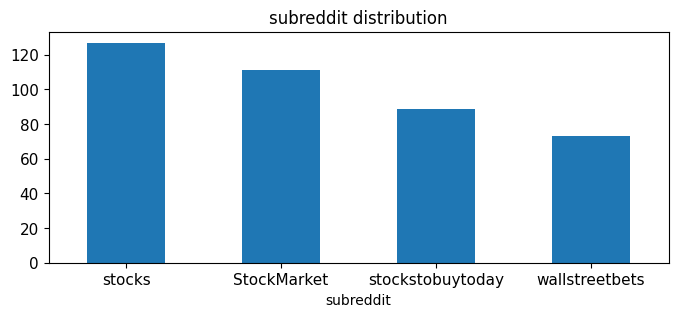

In [101]:
# plot barchart for rebreddit 

new_data_set_df_sample.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'subreddit distribution',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'subreddit distribution sample'}, xlabel='subreddit'>

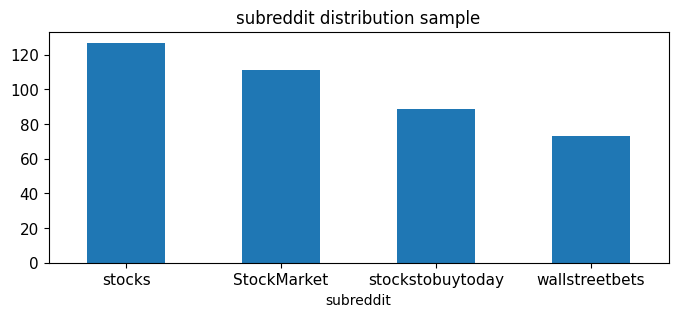

In [102]:
# plot barchart for rebreddit of Sample
new_data_set_df_sample.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'subreddit distribution sample',        
                                    rot = 0, fontsize = 11, figsize = (8,3))

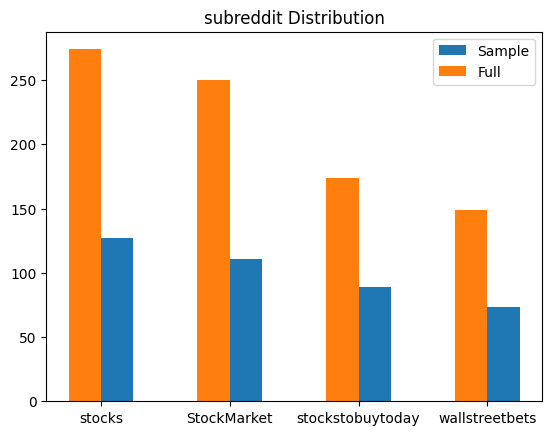

In [103]:
# Plot both sample and full set together
same_labels = (len(new_data_set_df_sample.subreddit.value_counts().index.union(new_data_set_df.subreddit.value_counts().index)) == len(new_data_set_df_sample.subreddit.value_counts().index) 
        == len(new_data_set_df.subreddit.value_counts().index))

if same_labels : # want to plot same labels
    # Creating x for spacing the bars
    bar_width = 0.25
    x_space = np.arange(len(new_data_set_df_sample.subreddit.value_counts().index.union(new_data_set_df_sample.subreddit.value_counts().index)))    
    labels = new_data_set_df_sample.subreddit.value_counts().index.union(new_data_set_df_sample.subreddit.value_counts().index)
    
    # Need to Reindex so the positions do align correctly
    X_sample_reindex = new_data_set_df_sample.subreddit.value_counts().reindex(labels, fill_value=0)
    X_reindex = new_data_set_df.subreddit.value_counts().reindex(labels, fill_value=0)

    # Plotting
    fig,ax = plt.subplots() #Creating subplot to grab several plots in one figure
    ax.bar( x_space+(bar_width/2) ,X_sample_reindex,bar_width, label="Sample")
    ax.bar( x_space-(bar_width/2) ,X_reindex, bar_width, label= "Full")
    plt.xticks(x_space,labels)
    ax.legend()
    plt.title("subreddit Distribution")
    plt.show()
else:
    print("----------- The indexes are different, cannot plot together -----------")

### Feature Creation

In [104]:
new_data_set_df['unigrams'] = new_data_set_df['text'].apply(lambda x: dmh.tokenize_text(x))
print(new_data_set_df["unigrams"][0:4])

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object


### Feature Selection

In [105]:
# ------------------ SPARSE MATRIX CREATION  -------------------------------------------
count_vect_new_data_set = CountVectorizer()
new_data_set_counts = count_vect_new_data_set.fit_transform(new_data_set_df.text) #learn the vocabulary and return document-term matrix
print((new_data_set_counts))




<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 17193 stored elements and shape (847, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1
  (1, 3696)	1
  (1, 388)	1
  (1, 2024)	2
  (1, 2310)	1
  (1, 4244)	1
  (1, 1168)	1
  (1, 3858)	1
  (1, 1409)	1
  (1, 2402)	1
  (1, 538)	1
  (1, 1083)	1
  (1, 175)	2
  (1, 3628)	1
  (1, 2161)	1
  (1, 3848)	1
  (1, 1568)	1
  (1, 2878)	1
  (1, 2645)	1
  (1, 887)	1
  (1, 3477)	1
  (1, 1412)	2
  (1, 3795)	1
  :	:
  (843, 3866)	1
  (843, 697)	1
  (843, 4229)	1
  (843, 3113)	1
  (844, 3654)	1
  (844, 3144)	1
  (844, 4076)	2
  (844, 2590)	1
  (844, 1241)	2
  (844, 323)	1
  (845, 2706)	1
  (845, 3911)	1
  (845, 4175)	1
  (845, 2580)	1
  (845, 3544)	1
  (845, 1443)	1
  (845, 3049)	1
  (845, 3548)	1
  (845, 1098)	1
  (845, 784)	1
  (845, 1134)	1
  (846, 1999)	1
  (846, 1344)	1
  (846, 3776)	1
  (846, 94)	1


In [106]:
# Full List of Features/Tokens
print(f"1) ---- Full List ----\n : {count_vect_new_data_set.get_feature_names_out()}")

# Getting Particular Feature/Token
print(f"2) ---- The token represents the vocabulary ----\n : {count_vect_new_data_set.get_feature_names_out()[new_data_set_counts.getrow(4).sorted_indices().indices[1]]}")



1) ---- Full List ----
 : ['00' '000' '01378' ... 'zgld' 'zone' 'zsil']
2) ---- The token represents the vocabulary ----
 : he


In [107]:
analyze = count_vect_new_data_set.build_analyzer()
# Toknization throught analyze of first row of text
analyze(new_data_set_df.text[0])



['calls', 'on', 'retards']

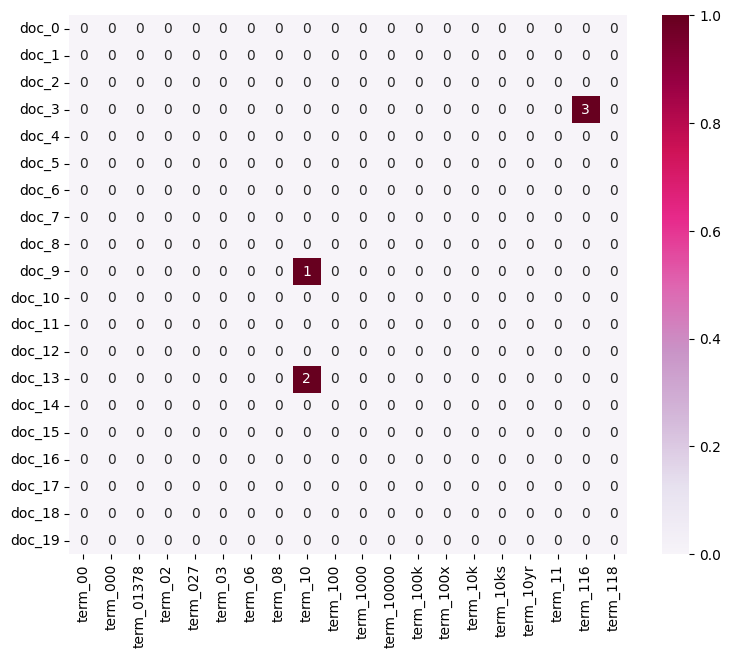

In [108]:
# RAW SPARSE MATRIX HEAT MAP 
plot_x = ["term_"+str(i) for i in count_vect_new_data_set.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_data_set_df.index)[0:20]]
dense_matrix = new_data_set_counts[0:20, 0:20].toarray() 


df_todraw = pd.DataFrame(dense_matrix, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

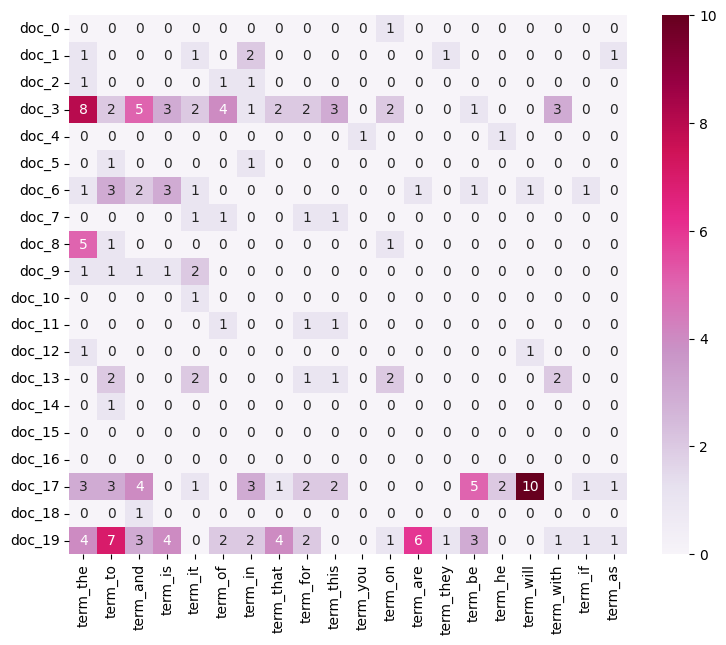

In [109]:

# Same process of creating axis with names
plot_x_exercise = ["term_"+str(i) for i in count_vect_new_data_set.get_feature_names_out()]
plot_y_exercise = ["doc_"+ str(i) for i in list(new_data_set_df.index)]
plot_z_exercise = new_data_set_counts.toarray()
# sum each col which will be used to sort the columns
cols_sum =  plot_z_exercise.sum(axis=0) 
df_todraw_exercise = pd.DataFrame(plot_z_exercise, columns = plot_x_exercise, index = plot_y_exercise)
# Add a row with the sum of each col
df_todraw_exercise.loc["cols_sum"] = cols_sum
#Short the columns based on the sum of each col, so the most frequent tokens will appear first
df_todraw_exercise = df_todraw_exercise.loc[:,(df_todraw_exercise.loc["cols_sum"]).sort_values(ascending=False).index]
# Create a new DF without the sum row
df_dropped_sum = df_todraw_exercise.drop("cols_sum", axis=0)
#Plot, I plot only the top 20 tokens that are more frequent for the first 20 documents.
plt.subplots(figsize=(9, 7))
# I let seaborn determine the color scaling based on the data instead of hardcoding it wiht [0,1]
ax = sns.heatmap(df_dropped_sum.iloc[:20,:20],
                 cmap="PuRd", annot=True)


##### **Comment**:
Stop words tominate the heat map in K importance

## Attribute Transformation / Aggregation


### Transform Text Data

In [110]:
new_data_set_term_frequencies = np.asarray(new_data_set_counts.sum(axis=0))[0]
g = px.bar(x=count_vect_new_data_set.get_feature_names_out()[:300], 
            y=new_data_set_term_frequencies[:300],title="Token Frequencies",labels = {"x":"Tokens","y":"Frequencies"})
g.show()

##### **Comment**:
Hard to analyse plot above

In [111]:
# Remove Stop words, too frequent words and rare words with CountVectorizer
count_vect_cleaned = CountVectorizer(stop_words="english",  # remove built-in English stopwords
    min_df=10,              # keep words in >=10 docs
    max_df=0.90             # drop words that appear too often across docs
)

new_data_set_counts_clean = count_vect_cleaned.fit_transform(new_data_set_df.text) #learn the vocabulary and return document-term matrix

if (new_data_set_counts_clean.shape)<(new_data_set_counts.shape):
    print("---------|The cleaned version has less features, as expected|---------")
    term_frequencies_clean = np.asarray(new_data_set_counts_clean.sum(axis=0))[0]
    g = px.bar(x=count_vect_cleaned.get_feature_names_out()[:300], 
                y=term_frequencies_clean[:300],title="Clean Token Frequencies",labels = {"x":"Filtered Tokens","y":"Frequencies"})
    g.show()



---------|The cleaned version has less features, as expected|---------


In [112]:
# Long tail analysis of cleaned data set

new_data_set_dense_matrix = new_data_set_counts_clean.toarray()
# sum each col which will be used to sort the columns
cols_sum =  new_data_set_dense_matrix.sum(axis=0) 
updated_new_data_set_df = pd.DataFrame(new_data_set_dense_matrix, columns = count_vect_cleaned.get_feature_names_out()
                                  , index = new_data_set_df.index)
# Add a row with the sum of each col
updated_new_data_set_df.loc["cols_sum"] = cols_sum
#Short the columns based on the sum of each col, so the most frequent tokens will appear first
updated_new_data_set_df = updated_new_data_set_df.loc[:,(updated_new_data_set_df.loc["cols_sum"]).sort_values(ascending=False).index]
#Now using plotly I plot the shorted columns based on the sum of each col, so most frequent ones will appear first
grahph_plot = px.bar(x=updated_new_data_set_df.columns, 
            y=updated_new_data_set_df.loc["cols_sum"],title=f"Cleaned Token Frequencies of all {len(updated_new_data_set_df.columns)}",labels = {"x":"Cleaned Tokens","y":"Frequencies"})
grahph_plot.show()


##### **Comment**:
From the long tail, words like Market, Just and Like came on top but I think is more important to notice the 3 most relevant words that are actually related to actual macro economics are Trump, China and Tariffs, this three are the real ones I need to soon into

In [113]:
# Log Transformation of data
term_frequencies_log = [math.log(i) for i in new_data_set_term_frequencies]
graph_plot = px.bar(x=count_vect_new_data_set.get_feature_names_out()[:300], 
                y=term_frequencies_log[:300],title="Log Token Frequencies",labels = {"x":"Cleaned Tokens","y":" Log Frequencies"})
graph_plot.show()


# Cleaned log frequencies plot
cleaned_term_frequencies_log = [math.log(i) for i in term_frequencies_clean]
graph_plot = px.bar(x=count_vect_cleaned.get_feature_names_out()[:300], 
                y=cleaned_term_frequencies_log[:300],title="Log Clean Token Frequencies",labels = {"x":"Cleaned Tokens","y":" Log Frequencies"})
graph_plot.show()


# Cleaned log long tail plot
new_data_set_dense_matrix = new_data_set_counts_clean.toarray()
# sum each col which will be used to sort the columns
cols_sum =  new_data_set_dense_matrix.sum(axis=0) 
log_cols_sum = [math.log(i) for i in cols_sum]
log_updated_new_data_set_df = pd.DataFrame(new_data_set_dense_matrix, columns = count_vect_cleaned.get_feature_names_out()
                                  , index = new_data_set_df.index)
# Add a row with the sum of each col
log_updated_new_data_set_df.loc["cols_sum"] = log_cols_sum
#Short the columns based on the sum of each col, so the most frequent tokens will appear first
log_updated_new_data_set_df = log_updated_new_data_set_df.loc[:,(log_updated_new_data_set_df.loc["cols_sum"]).sort_values(ascending=False).index]
#Now using plotly I plot the shorted columns based on the sum of each col, so most frequent ones will appear first
grahph_plot = px.bar(x=log_updated_new_data_set_df.columns, 
            y=log_updated_new_data_set_df.loc["cols_sum"],title="Log Cleaned Token Frequencies",labels = {"x":"Cleaned Tokens","y":"Log Frequencies"})
grahph_plot.show()



##### **Comment**:
Log and Cleaned graphs give a more organized view of the features, After eliminating stop and too frequent words, can see some words Log dominance is not very big, the distribution is more uniform but words based on my intuition about markets and geo politics as top "recurring" like Market , Trump and China

### New Visualizations

In [114]:
# Creation of lists for Recollecting data for 3D visualization 
sentiment_list =[]
polarity_list = []
subjectivity_list = []
word_list =[]
frequency_list = []


count_x= 0
for token in range(new_data_set_counts.shape[1]):
    mask =(new_data_set_counts[:,token].toarray().ravel()>0)
    freq_sum = new_data_set_counts[:,token].toarray().ravel().sum()
    count_x += 1
    if mask.any():
        sentiment_list.append((new_data_set_df.sentiment[mask].values.sum())/len(new_data_set_df.sentiment[mask].values))
        subjectivity_list.append((new_data_set_df.subjectivity[mask].values.sum())/len(new_data_set_df.subjectivity[mask].values))
        polarity_list.append((new_data_set_df.polarity[mask].values.sum())/len(new_data_set_df.polarity[mask].values))
        word_list.append(count_vect_new_data_set.get_feature_names_out()[token])
        frequency_list.append(freq_sum)
        

# Creation of new DF that contains the frequency, mean Sentiment,  mean subjetivity and mean polarity per token
macro_data_frame = pd.DataFrame({"Frequency":frequency_list,"Polarity":polarity_list,"Sentiment":sentiment_list,"Objetivity":subjectivity_list},index=word_list)

# My list is actually capturing all the columns 
if len(sentiment_list) == new_data_set_counts.shape[1]:
    print("Lists are capturing all information")
else:
    print("List are not capturing all information")

Lists are capturing all information


In [115]:
# Inspection of new DF for plot
Cleaned_macro_data_frame = macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))]
print("1) ---- Shape ----\n",Cleaned_macro_data_frame.shape)
print("2) ---- DF ----\n",Cleaned_macro_data_frame)

1) ---- Shape ----
 (147, 4)
2) ---- DF ----
          Frequency  Polarity  Sentiment  Objetivity
market         111 -0.001957   0.283582    0.379658
just            95  0.058646   0.250000    0.371004
trump           92 -0.007972   0.041667    0.475279
like            83  0.044377   0.289855    0.417180
china           72  0.103210   0.413793    0.411776
...            ...       ...        ...         ...
haven           10  0.107777   0.600000    0.415806
days            10  0.065863   0.200000    0.387186
maybe           10  0.081523   0.200000    0.473383
support         10 -0.041372   0.200000    0.399679
thanks          10  0.201996   1.000000    0.317226

[147 rows x 4 columns]


In [116]:
fig3d = px.scatter_3d(
    macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))],
    x="Frequency",
    y="Polarity",
    z="Objetivity",
    hover_name=macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))].index.astype(str),
    hover_data={"Frequency":":.3f", "Polarity":":.3f", "Objetivity":True},
    title=f"Tokens Polarity vs Subjectivity vs Frequency"
)
fig3d.show()

##### **Comment**:
As previously percieved, Raw numbers make the few words with high distribution dominate the visual, so cant appreate that well, Next plot will use LOG values

In [117]:
# Log transformation
log_Cleaned_macro_data_frame = Cleaned_macro_data_frame.copy()
log_Cleaned_macro_data_frame.Frequency = Cleaned_macro_data_frame.Frequency.apply(lambda x : math.log(x))


In [118]:
fig3d = px.scatter_3d(
    log_Cleaned_macro_data_frame,
    x="Frequency",
    y="Polarity",
    z="Objetivity",
    hover_name=macro_data_frame.loc[(list(log_updated_new_data_set_df.columns))].index.astype(str),
    hover_data={"Frequency":":.3f", "Polarity":":.3f", "Objetivity":True},
    title=f"Tokens Polarity vs Subjectivity vs Frequency"
)


fig3d.show()

##### **Comment**:
I see in the visualization that polarity AVG seems to be close to 0 while some words to deviate but this words are words that denote positive or negative things in its meaning like bad or great, So perhaps further cleaning for this wwords would help have a better look. Objectivity seems to have more variance.

This analysis tries to see if the mean value of each token appeareance in their documents but  the Objectivity and Polarity ratings are NOT initally computed per WORD/TOKEN but per document, something important to take into account. 

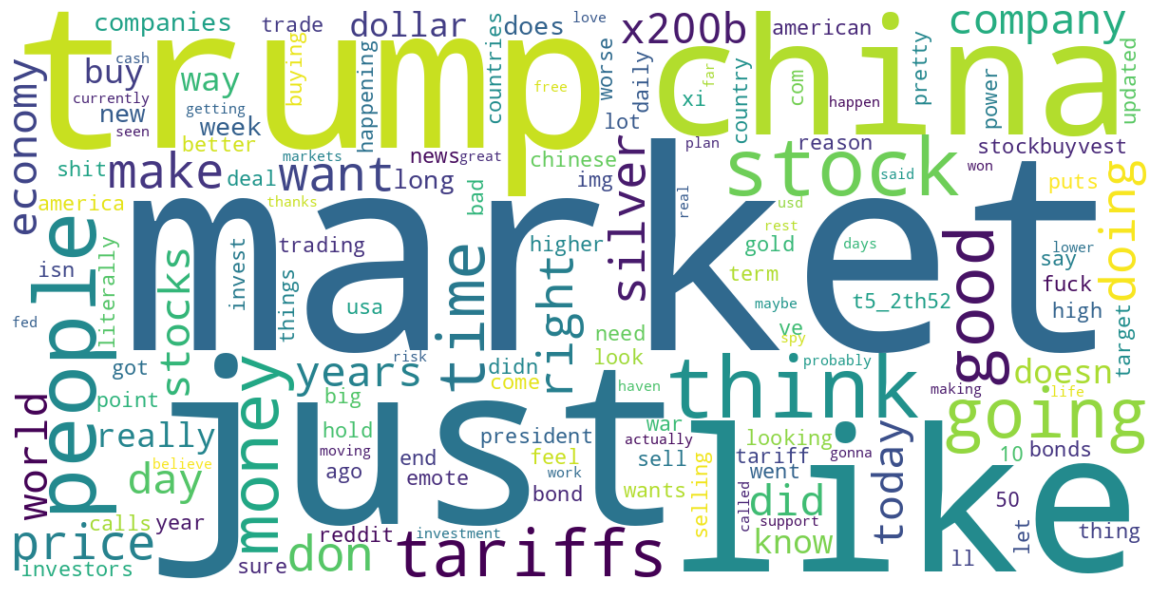

In [119]:
# CLOUD WORD plot

if wordcloud_toggle :
      word_freq_dic = log_Cleaned_macro_data_frame.Frequency.to_dict()

      wc = (WordCloud(width=1200, height=600, background_color="white", max_words=300)
            .generate_from_frequencies(word_freq_dic))

      plt.figure(figsize=(12, 6))
      plt.imshow(wc, interpolation="bilinear")
      plt.axis("off")
      plt.tight_layout()
      plt.show()
else:
      print ("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
      print ("                                              ERROR                                                   ")
      print ("---------------- Must Install wordcloud library to display this visualization ------------------------")
      print ("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

##### **Comment**:
As a intitive visualization, this word cloud is pretty good but my opinion is that is not adding any extra layer of analysis compared to the frequency graphs, is good way to present it to non technical shareholders  

In [120]:
# Bigram Analysis and plot
count_vect_cleaned_bigram = CountVectorizer(stop_words="english",  # remove built-in English stopwords
    ngram_range=(2, 2),     # bigram argument <----
    min_df=2,              # keep words in >=2
    max_df=0.95             # remove words that are too often
)

new_data_set_counts_clean_bigram = count_vect_cleaned_bigram.fit_transform(new_data_set_df.text) 

term_frequencies_clean_bigram = np.asarray(new_data_set_counts_clean_bigram.sum(axis=0))[0]
bigrams_series = pd.Series(term_frequencies_clean_bigram,index=count_vect_cleaned_bigram.get_feature_names_out())
sorted_bigrams_series= bigrams_series.sort_values(ascending=False)

grahph_plot = px.bar(x=sorted_bigrams_series.values[:20], 
            y= sorted_bigrams_series.index[:20] ,title="Bigram Frequency Top 20 most important",labels = {"x":"Cleaned Bigram Tokens","y":" Frequencies"},orientation="h")
grahph_plot.show()

##### **Comment**:
So far witht the actual bigram constructions, it does not seem to display any significant insites yet, perhaps with try and error of different regex patterns, something better could be found.

# Phase 2


## Part 1 & 2

## Finding Patterns

In [121]:
### Begin Assignment Here

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
sentiment = new_data_set_df['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each category

for sub in sentiment:
    # Filter the original DataFrame by sub
    sentiment_dfs[sub] = new_data_set_df[new_data_set_df['sentiment'] == sub].copy()


# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for sub in sentiment:
    filt_term_document_dfs[sub] = create_term_document_df(sentiment_dfs[sub])



In [122]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
sentiment_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for subbs {sentiment[sentiment_number]}:")
filt_term_document_dfs[sentiment[sentiment_number]]

Filtered Term-Document Frequency DataFrame for subbs -1.0:


,01378,027,10,100,100k,100x,11,12,125,13,...,yields,yikes,yippee,yo,you,your,yourselves,youtube,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[3 3 1 ... 1 1 1]


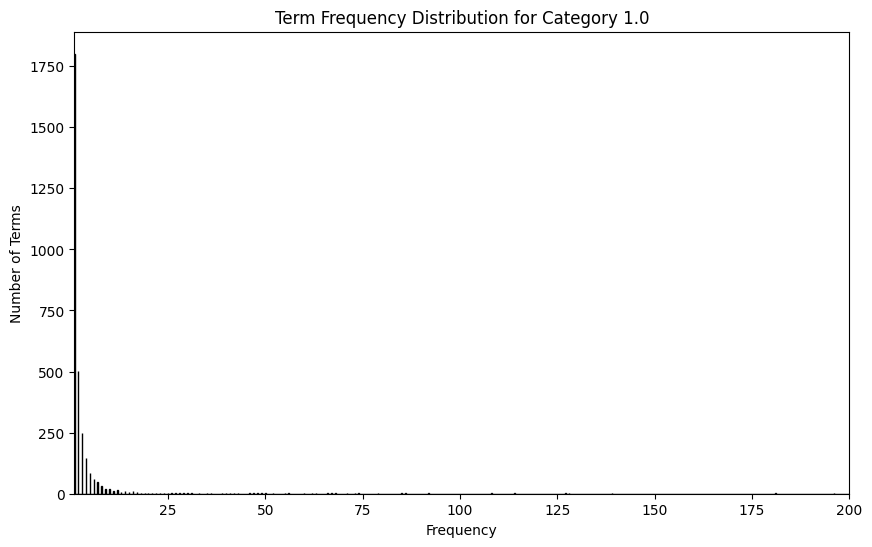

In [123]:
 # Sum over all documents to get total frequency for each word
sentiment_number=1 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiment[sentiment_number]].sum(axis=0).to_numpy()
 
print(word_counts)

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {sentiment[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

### Comment <----
Graph looks this unzoomed due to having values that are very far away from the main cluster, making x axis very long and hard to read.

In [124]:
sentiment_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiment[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)

top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Subreddit: {sentiment[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Subreddit: -1.0
Number of terms in top 5%: 81
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'in', 'of', 'that', 'this', 'you', 'for', 'he', 'are', 'trump', 'if', 'they', 'so', 'on', 'be', 'will', 'but', 'as', 'just', 'not', 'us', 'with', 'can', 'what', 'have', 'like', 'at', 'all', 'his', 'was', 'think', 'about', 'my', 'or', 'now', 'people', 'an', 'even', 're', 'their', 'we', 'when', 'bad', 'going', 'china', 'has', 'tariffs', 'more', 'no', 'fuck', 'from', 'market', 'him', 'than', 'money', 'up', 'see', 'there', 'do', 'how', 'by', 'silver', 'out', 'one', 'only', 'go', 'why', 'down', 'still', 'me', 'long', 'shit', 'economy', 'want', 'some', 'make', 'too']


In [125]:
sentiment_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiment[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiment[sentiment_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Subreddit: {sentiment[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Subreddit: -1.0
Number of terms in bottom 1%: 16
Filtered terms: ['wit', 'writing', '17th', 'ws', 'wsb', 'xeqt', '1700', 'ya', '2011', '2s', '11', '125', '13', '140', 'portfolios', 'poses']


In [126]:
sentiment_number=1 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    print(f"top {top_n}")
    print(f"bottom {bottom_n}")
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    list_bottom.append (sorted_words.head(bottom_n))
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    list_top.append(sorted_words.tail(top_n))
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

list_bottom = []
list_top = []

for subs in sentiment:
    print(f'\nFor category {subs} we filter the following words:')
    term_document_dfs[subs] = filter_top_bottom_words_by_sum(filt_term_document_dfs[subs])


# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiment[sentiment_number]}:")
term_document_dfs[sentiment[sentiment_number]]



For category -1.0 we filter the following words:
top 81
bottom 16
Bottom 1.0% words: 
wit           1
writing       1
17th          1
ws            1
wsb           1
xeqt          1
1700          1
ya            1
2011          1
2s            1
11            1
125           1
13            1
140           1
portfolios    1
poses         1
dtype: int64
Top 5.0% words: 
too          9
make         9
some         9
want         9
economy      9
          ... 
it          99
is         113
and        121
to         144
the        236
Length: 81, dtype: int64

For category 1.0 we filter the following words:
top 156
bottom 31
Bottom 1.0% words: 
10ks            1
125             1
zsil            1
1961            1
1953            1
1947            1
1945            1
outperformed    1
186             1
outlandish      1
17th            1
1728            1
160             1
15m             1
150             1
145             1
zone            1
208             1
wrote           1
passion 

,00,000,06,08,100,1000,10000,10k,11,116,...,yield,yields,yippee,yo,young,yours,yourself,yoyo,zero,zgld
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
# Shared tokens
long_bottom_list = pd.concat([list_bottom[0],list_bottom[1],list_bottom[2]],ignore_index=False)
long_top_list = pd.concat([list_top[0],list_top[1],list_top[2]],ignore_index=False)
print(f"1) Shared bottom of 2 or more frec: \n \t\t{len(long_bottom_list.index.value_counts()[long_bottom_list.index.value_counts() > 1])}")
print(f"2) Shared bottom of 1 frec: \n \t\t {len(long_bottom_list.index.value_counts()[long_bottom_list.index.value_counts() == 1])}")
print(f"3) Share top: \n {long_top_list[::-1][:100].index.value_counts()}")
print(len(long_top_list))


1) Shared bottom of 2 or more frec: 
 		5
2) Shared bottom of 1 frec: 
 		 49
3) Share top: 
 the      2
to       2
is       2
it       2
and      2
        ..
after    1
any      1
emote    1
but      1
their    1
Name: count, Length: 65, dtype: int64
300


In [128]:
from PAMI.extras.convert.DF2DB import DF2DB    

# Loop through the dictionary of term-document DataFrames
for subs in term_document_dfs:
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[subs])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{subs}.csv', '>=', 1)



In [129]:
list_sent = []
for t in term_document_dfs:
    list_sent.append(t)
    
print(list_sent)


[np.float64(-1.0), np.float64(1.0), np.float64(0.0)]


Database size (total no of transactions) : 196
Number of items : 1534
Minimum Transaction Size : 1
Average Transaction Size : 12.918367346938776
Maximum Transaction Size : 66
Standard Deviation Transaction Size : 10.813987040023255
Variance in Transaction Sizes : 117.54201988487702
Sparsity : 0.9915786392783972


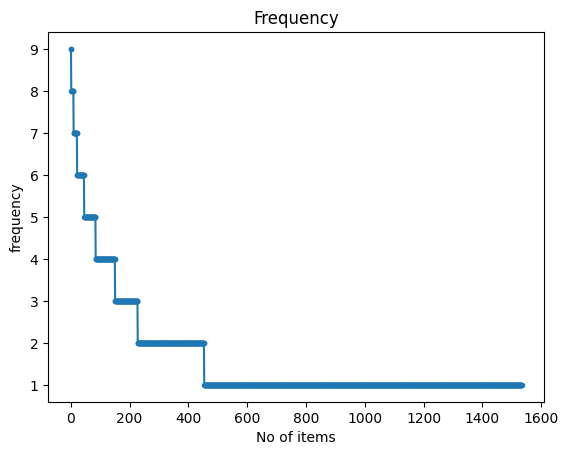

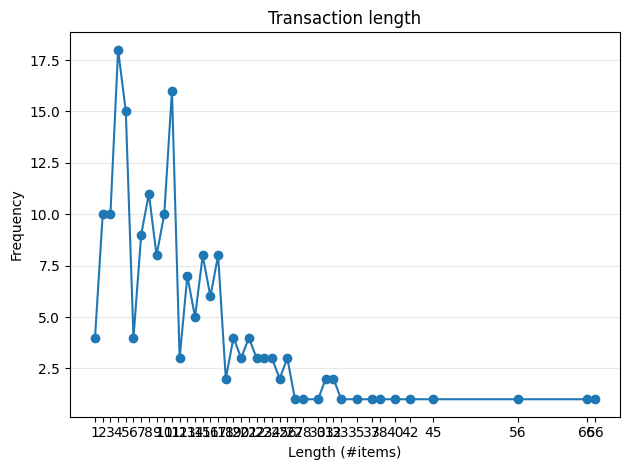

In [130]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'td_freq_db_{list_sent[0]}.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 317
Number of items : 2940
Minimum Transaction Size : 1
Average Transaction Size : 16.681388012618296
Maximum Transaction Size : 197
Standard Deviation Transaction Size : 22.259781119469036
Variance in Transaction Sizes : 497.0658866749191
Sparsity : 0.9943260584991094


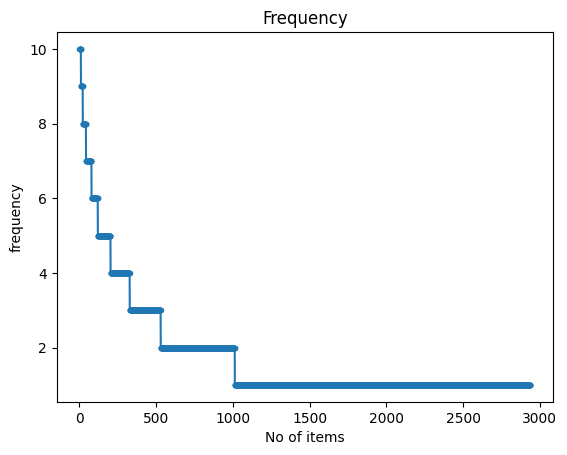

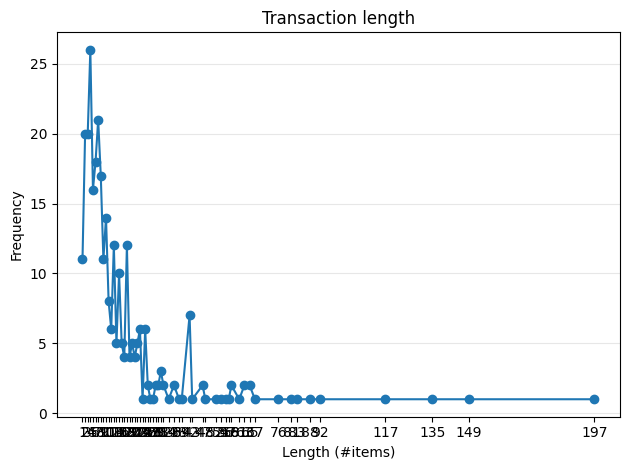

In [131]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'td_freq_db_{list_sent[1]}.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 326
Number of items : 1192
Minimum Transaction Size : 1
Average Transaction Size : 5.911042944785276
Maximum Transaction Size : 32
Standard Deviation Transaction Size : 4.761302421896447
Variance in Transaction Sizes : 22.739754601226995
Sparsity : 0.9950410713550459


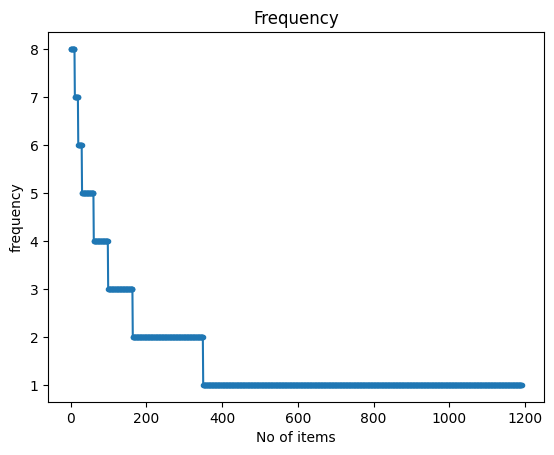

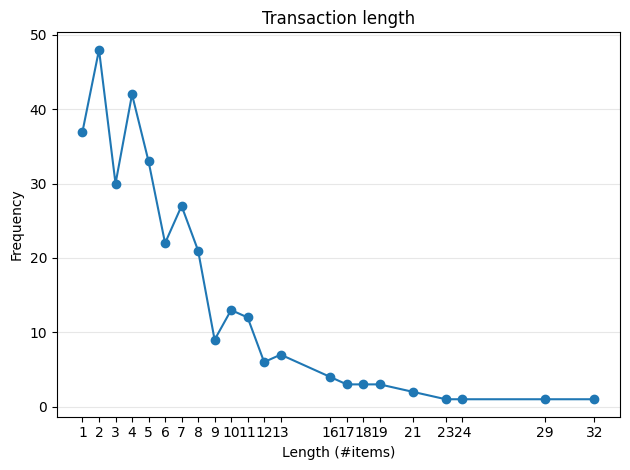

In [132]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase(f'td_freq_db_{list_sent[2]}.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [133]:
list_sent

[np.float64(-1.0), np.float64(1.0), np.float64(0.0)]

In [134]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6 # minSup changed to 6 since 9 excels 0 patterns
obj1 = alg.FPGrowth(iFile=f'td_freq_db_{list_sent[0]}.csv', minSup=minSup)
obj1.mine()
frequentPatterns_minus_one= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatterns_minus_one))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
frequentPatterns_minus_one

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 46
Runtime: 0.0033240318298339844


,Patterns,Support
0,retard,6
1,investment,6
2,seems,6
3,went,6
4,without,6
5,life,6
6,man,6
7,does,6
8,idiot,6
9,least,6


In [135]:
minSup=6 # minSup changed to 6 since 9 excels 0 patterns
obj1 = alg.FPGrowth(iFile=f'td_freq_db_{list_sent[1]}.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_one= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_one))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print(frequentPatternsDF_one)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 120
Runtime: 0.008966684341430664
     Patterns  Support
0        ever        6
1      months        6
2         end        6
3    actually        6
4        used        6
..        ...      ...
115     today       10
116   america       10
117    thanks       10
118  everyone       10
119    always       10

[120 rows x 2 columns]


In [136]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6 # minSup changed to 6 since 9 excels 0 patterns
obj1 = alg.FPGrowth(iFile=f'td_freq_db_{list_sent[2]}.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_zero= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_zero))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
print(frequentPatternsDF_zero)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 34
Runtime: 0.002555370330810547
                   Patterns  Support
0                      call        6
1                      news        6
2                        re        6
3                  anything        6
4                   already        6
5                       out        6
6                    btcusd        6
7                    ethusd        6
8            ethusd\tbtcusd        6
9                   pepeusd        6
10          pepeusd\tbtcusd        6
11          pepeusd\tethusd        6
12  btcusd\tpepeusd\tethusd        6
13                     here        6
14                     want        7
15                     when        7
16                   stocks        7
17                     even        7
18               highlights        7
19                    doing        7
20                  tariffs        7
21                       me        7
22        

In [137]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatterns_minus_one, frequentPatternsDF_one, frequentPatternsDF_zero]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1
        

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)


# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                    Patterns  Support
128                  someone       10
127                  country       10
126                   pretty       10
132                   thanks       10
125                  looking       10
..                       ...      ...
136                   btcusd        6
135                      out        6
141          pepeusd\tethusd        6
142  btcusd\tpepeusd\tethusd        6
140          pepeusd\tbtcusd        6

[156 rows x 2 columns]
Number of patterns discarded: 44


In [138]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
new_data_set_df_tdm = count_vect.fit_transform(new_data_set_df['text'])  
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
new_data_set_df['tokenized_text'] = new_data_set_df['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=new_data_set_df.index, columns=final_pattern_df['Patterns'])


# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = new_data_set_df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(new_data_set_df_tdm.toarray(), columns=terms, index=new_data_set_df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print(augmented_df)

     00  000  01378  02  027  03  06  08  10  100  ...  fair  re  pepeusd  \
0     0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
1     0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
2     0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
3     0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
4     0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...   ...  ..      ...   
842   0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
843   0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
844   0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
845   0    0      0   0    0   0   0   0   0    0  ...     0   0        0   
846   0    0      0   0    0   0   0   0   0    0  ...     0   0        0   

     ethusd\tbtcusd  ethusd  btcusd  out  pepeusd\tethusd  \
0             

In [139]:
# Answer Here

#MaxFPGrowth --------------------------------------------------------------------
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
maxfp_dic = {"Total_No_Patterns":[],"Run_Time":[]}
# Inputs
mins = [3,6,9]
# Loop to process the different minsup values
for min in mins:
    obj = alg.MaxFPGrowth(iFile=f'td_freq_db_{list_sent[0]}.csv', minSup=min, sep='\t') #initialize
    obj.mine()            #start the mining process
    frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
    maxfp_dic["Total_No_Patterns"].append(str(len(frequentPatternsDF)))
    maxfp_dic["Run_Time"].append(str(obj.getRuntime()))
    if min == 6:
        base_holder = [frequentPatternsDF]
        
# Print the summary of Maximal FPGrowth
maxpf_df = pd.DataFrame(maxfp_dic, index = mins)
print("\n----SUMMARY Maximal FPGrowth----")
print(maxpf_df,"\n")

#FAE --------------------------------------------------------------------
from PAMI.frequentPattern.topk import FAE  as alg
FAE_dic = {"Total_No_Patterns":[],"Run_Time":[]}
# Inputs
ksteps = [75,130,180]
# Loop to process the different minsup values
for k in ksteps:
    obj = alg.FAE(iFile=f'td_freq_db_{list_sent[0]}.csv', k=k, sep='\t')    
    obj.mine()           
    frequentPatternsDF_FAE = obj.getPatternsAsDataFrame()
    FAE_dic["Total_No_Patterns"].append(str(len(frequentPatternsDF_FAE)))
    FAE_dic["Run_Time"].append(obj.getRuntime())
    if k == 130:
        # Printing Comparision of the 3 algos for similar number of patterns <---
        print("1) ---- Maximal FPGrowth at minsup 6 ----")
        print(base_holder[0].tail(3))
        print("2) ---- FPGrowth at minsup 6 ----")
        print(frequentPatterns_minus_one.tail(3))
        print("3) ---- Fae at k = 180 ----")
        print(frequentPatternsDF_FAE.tail(3))
    
# Print the summary of FAE
FAE_df = pd.DataFrame(FAE_dic, index = ksteps)
print(f"\n----SUMMARY FAE at K {ksteps}----")
print(FAE_df)


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 

----SUMMARY Maximal FPGrowth----
  Total_No_Patterns               Run_Time
3               217   0.010861635208129883
6                46   0.004998445510864258
9                 2  0.0025157928466796875 

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
1) ---- Maximal FPGrowth at minsup 6 ----
   Patterns  Support
43     who         8
44     our         9
45    time         9
2) ---- FPGrowth at minsup 6 ----
   Patterns  Support
43      don        8
44     time        9
45      our        9
3) ---- Fae at k = 180 ----
    Patterns  Support
127  chinese        4
128   reddit        4
129      off        4
 TopK frequent patterns were succe

### Comments <---

-Performance:
    Since there is not alot of patterns, they are all running fast, since the amoutn of patterns found on each algo is different they are
    not as comparable directly.

-Pattern:
    They all recollected stope type of stop words(like our) even if we filtered for top and bottom worst offenders. MaxFPGrowth and PFGrowth seem to have similar paterns 
    in the tope whole Fae has different ones, just like in MASTER file, Fae does recollect different things.


# Dimensionality Reduction

In [140]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
new_data_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
new_data_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
new_data_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [141]:
print(f"PCA SHAPE {new_data_pca_tdm.shape}")
print(f"TSNE SHAPE {new_data_tsne_tdm.shape}")
print(f"UMAP SHAPE {new_data_umap_tdm.shape}")

PCA SHAPE (847, 2)
TSNE SHAPE (847, 2)
UMAP SHAPE (847, 2)


### Non Augmented data

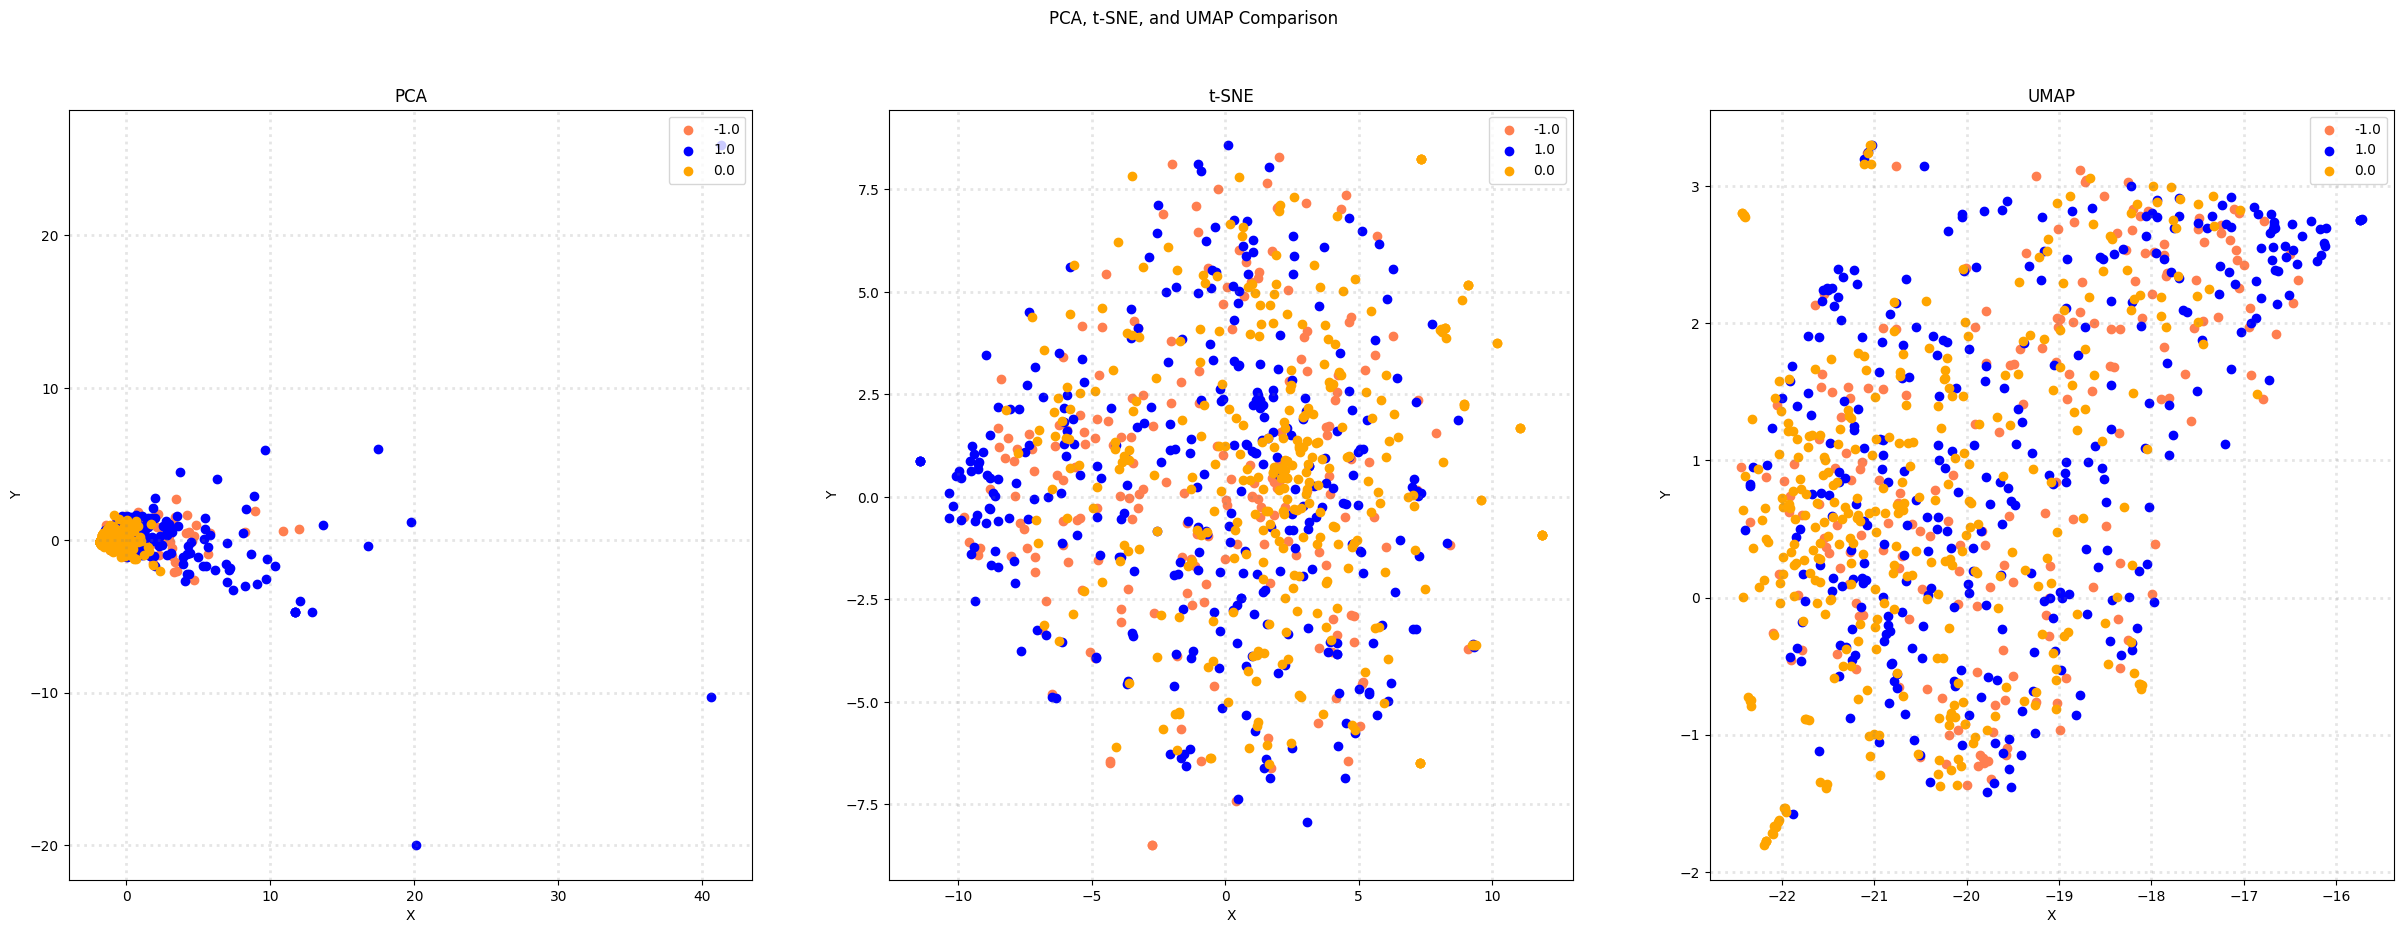

In [142]:
# Plot the results in subplots
col = ['coral', 'blue', 'orange']


fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, new_data_reduced, title):
    for c, sent in zip(col, sentiment):
        xs = new_data_reduced[new_data_set_df['sentiment'] == sent].T[0]
        ys = new_data_reduced[new_data_set_df['sentiment'] == sent].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sent)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], new_data_pca_tdm, 'PCA')
plot_scatter(axes[1], new_data_tsne_tdm, 't-SNE')
plot_scatter(axes[2], new_data_umap_tdm, 'UMAP')

plt.show()

### Augmented data

In [143]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
new_data_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
new_data_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
new_data_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

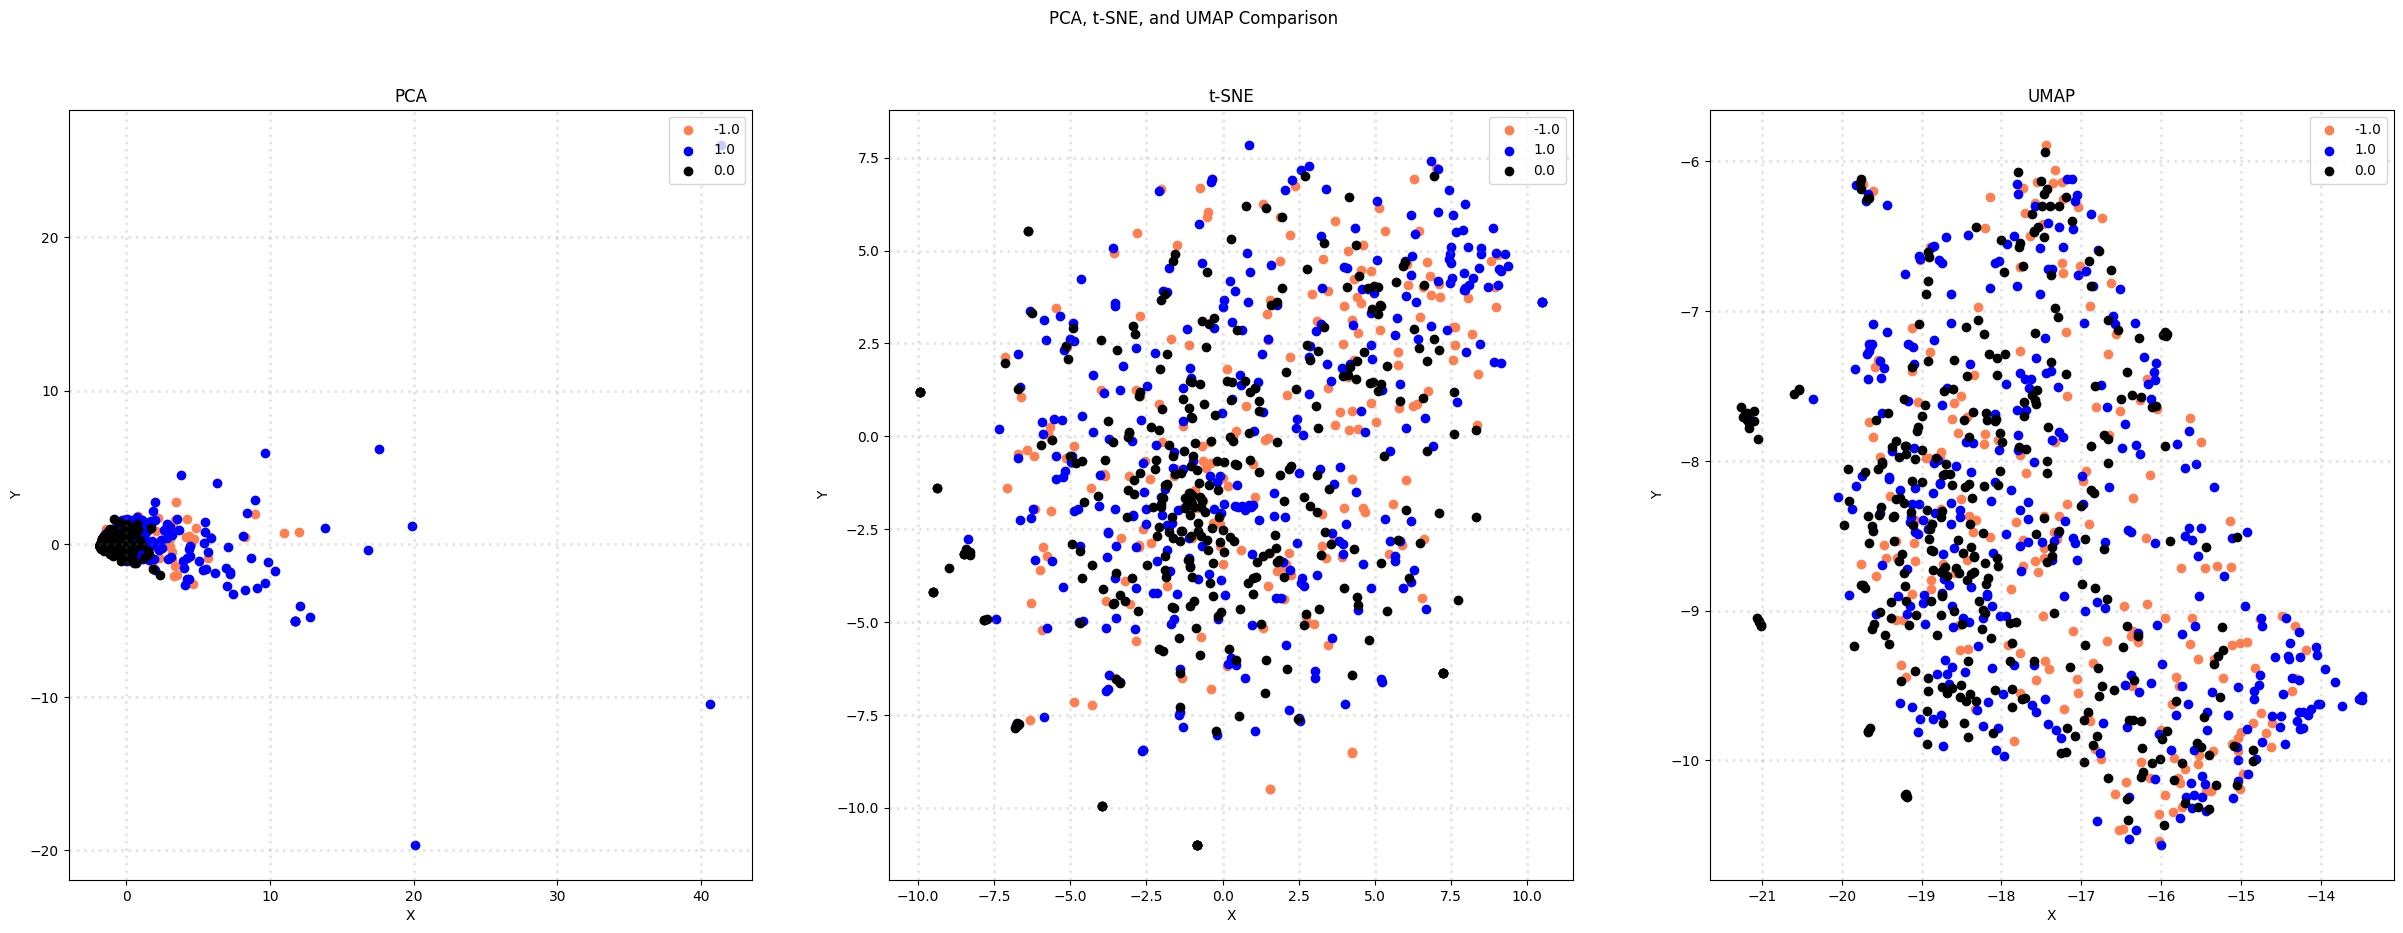

In [144]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, new_data_reduced, title):
    for c, sent in zip(col, sentiment):
        xs = new_data_reduced[new_data_set_df['sentiment'] == sent].T[0]
        ys = new_data_reduced[new_data_set_df['sentiment'] == sent].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sent)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], new_data_pca_aug, 'PCA')
plot_scatter(axes[1], new_data_tsne_aug, 't-SNE')
plot_scatter(axes[2], new_data_umap_aug, 'UMAP')

plt.show()

### 3D Augmented data

C:\Users\g_med\AppData\Local\Temp\ipykernel_16968\895274605.py:28: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



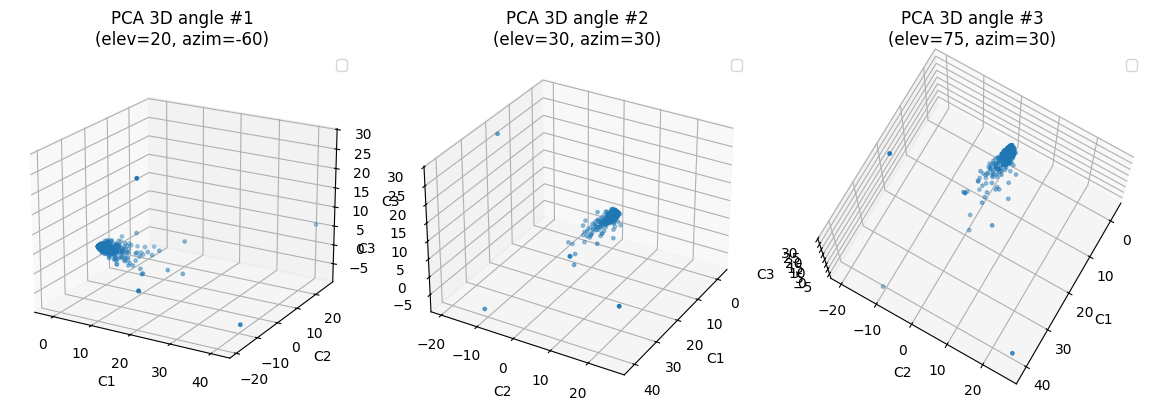

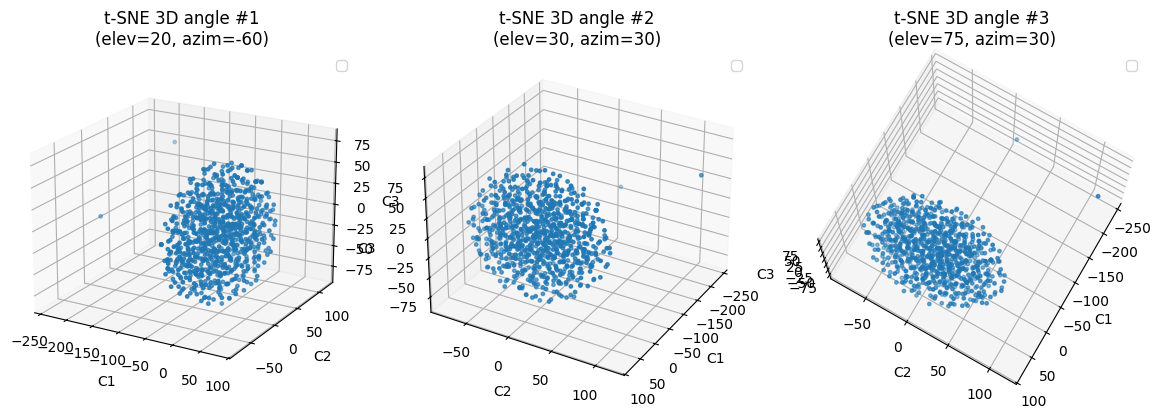

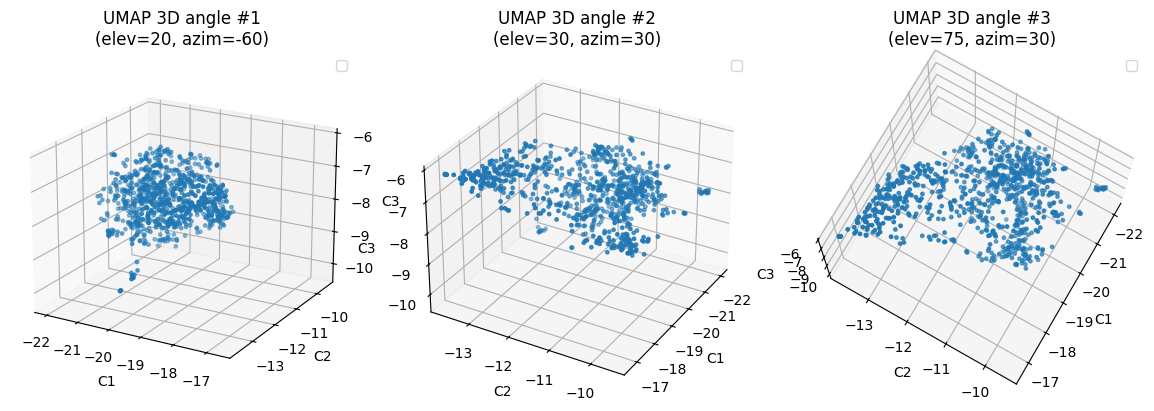

In [145]:
#Answer Here

# PCA, t-SNE, and UMAP ----------------------------------------------------
new_data_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
new_data_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
new_data_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)


# 3D Plotting Function----------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D  # just to register 3D

def plot3d_views(df, labels=None, title="3D embedding"):
    views = [(20, -60), (30, 30), (75, 30)]  # (elev, azim)
    fig = plt.figure(figsize=(12,4))
    for i, (elev, azim) in enumerate(views, 1):
        ax = fig.add_subplot(1, 3, i, projection='3d')
        if labels is None:
            ax.scatter(df[:,0], df[:,1], df[:,2], s=6)
        else:
            for lab in np.unique(labels):
                m = (labels == lab)
                ax.scatter(df[m,0], df[m,1], df[m,2], s=6, label=str(lab))
            ax.legend(frameon=False)
        ax.set_title(f"{title} angle #{i}\n(elev={elev}, azim={azim})")
        ax.set_xlabel('C1'); ax.set_ylabel('C2'); ax.set_zlabel('C3')
        ax.view_init(elev=elev, azim=azim)
        ax.grid(True, linestyle=':', alpha=0.3)
        ax.legend(loc='upper right')
    plt.tight_layout()

# Plotting ----------------------------------------------------
plot3d_views(new_data_pca_aug, title="PCA 3D")
plot3d_views(new_data_tsne_aug, title="t-SNE 3D")
plot3d_views(new_data_umap_aug, title="UMAP 3D")


### Comments <---


-PCA:  Views seem very similar, I dont think extra information can be seen from the different angles here.

-T-SNE:  Views also remain quite similar here.

-UMAP: The different angles provide good insight in this case, I can see good differences in all three.



# Discretization and Binarization

In [146]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(new_data_set_df['sentiment'])
new_data_set_df['bin_sentiment'] = mlb.transform(new_data_set_df['sentiment']).tolist()

In [147]:
new_data_set_df

,type,datetime,post_id,subreddit,title,author,url,upvotes,text,subjectivity,polarity,sentiment,entities,label,unigrams,tokenized_text,bin_sentiment
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]","{retards, Calls, on}","[1, 0, 0]"
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma...","{about, a, did, place?, company, in, first, ev...","[0, 0, 1]"
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]","{in, ticker., of, the, red, Seeing, lots}","[0, 1, 0]"
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","{Torrente's, a, new, watercraft., The, have, c...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0,"[He, didn, ’, t, say, thank, you, .]","{didn’t, say, thank, He, you.}","[0, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0,"[Invest, now, it, is, going, to, shoot, up, to...","{tomorrow, now, up, Invest, is, to, shoot, goi...","[0, 1, 0]"
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,Where can I read this?,0.000000,0.000000,0.0,[],0.0,"[Where, can, I, read, this, ?]","{can, Where, read, I, this?}","[0, 1, 0]"
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0,"[Upgrades, ,, Downgrades, [, Stock, Analyst, R...","{Downgrades, Nasdaq](), Upgrades, Upgrades,, |...","[0, 1, 0]"
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0,"[i, sold, my, puts, so, i, expect, cheeto, to,...","{sold, so, declare, cheeto, expect, on, to, wa...","[0, 1, 0]"


In [148]:
# Answer here
print(f"number of bins for title :  {len(new_data_set_df.title.unique())}")
mlb.fit(new_data_set_df.title)
new_data_set_df['bin_title'] = mlb.transform(new_data_set_df['title']).tolist()
print(new_data_set_df.iloc[:4,-3:])


number of bins for title :  127
                                      tokenized_text bin_sentiment  \
0                               {retards, Calls, on}     [1, 0, 0]   
1  {about, a, did, place?, company, in, first, ev...     [0, 0, 1]   
2          {in, ticker., of, the, red, Seeing, lots}     [0, 1, 0]   
3  {Torrente's, a, new, watercraft., The, have, c...     [0, 0, 1]   

                                           bin_title  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


### Comments <---

The binarization technique works for title but created alot of bins


# Data Exploration

In [149]:
# We retrieve 3 sentences for a random record , seed 42 to keep same result
random_generator = np.random.default_rng(seed=42)
number_saver = []
number_selected = random_generator.integers(0, new_data_set_df.shape[0], size=3)
print(f"Randomly selected records: {number_selected}")
    
document_to_transform_1 = []
random_record_1 = new_data_set_df.iloc[number_selected[0]]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = new_data_set_df.iloc[number_selected[1]]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = new_data_set_df.iloc[number_selected[2]]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Randomly selected records: [ 75 655 554]


In [150]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['"New to investing" but almost $50k port. Ok there.']
['That’s an 11% drop, even with the delusional still believing he’s a genius!']
["Selling my Silver, pity it's just a miniscule amount"]


In [151]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [152]:
# Checking the vectors before running cosine similarities
print("Checking Vectors length of non 0 values and shape")
print("Document_vector_count_1 non 0 vals:  ",np.sum(document_vector_count_1.todense()))
print("Document_vector_count_1 Shape:  ",(document_vector_count_1.todense()).shape)
print("Document_vector_count_2 non 0 vals:  ",np.sum(document_vector_count_2.todense()))
print("Document_vector_count_2 Shape:  ",(document_vector_count_2.todense()).shape)
print("Document_vector_count_3 non 0 vals:  ",np.sum(document_vector_count_3.todense()))
print("Document_vector_count_3 Shape:  ",(document_vector_count_3.todense()).shape)

Checking Vectors length of non 0 values and shape
Document_vector_count_1 non 0 vals:   9
Document_vector_count_1 Shape:   (1, 4346)
Document_vector_count_2 non 0 vals:   12
Document_vector_count_2 Shape:   (1, 4346)
Document_vector_count_3 non 0 vals:   8
Document_vector_count_3 Shape:   (1, 4346)


In [153]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})



Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\g_med\AppData\Local\Temp\ipykernel_16968\1464543525.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\g_med\AppData\Local\Temp\ipykernel_16968\1464543525.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\g_med\AppData\Local\Temp\ipykernel_16968\1464543525.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\g_med\AppData\Local\Temp\ipykernel_16968\1464543525.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 t

### Comments <---
 
This cosine similarity telling us that 1 and 3 are complely orthogonal, the are perpendiculat to each and go indifferent directions. 
All three have low are virtually non existent, meaning they are or orthogonal.



# Data Classification

## Naive Bayes
### Non Augmented DATA

In [154]:
#Model with only the document-term frequency data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

multinomial_dic = {}

target_names = [str(x) for x in new_data_set_df['sentiment'].unique()]
# Split the data into training and testing sets (70% train, 30% test)
new_data_train, new_data_test, y_train, y_test = train_test_split(tdm_df, new_data_set_df['sentiment'], test_size=0.3, random_state=21)

In [155]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(new_data_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(new_data_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))
multinomial_dic["MultinomialNB() Non Augmented Data"] = accuracy_score(y_test, y_pred)

Accuracy: 0.5372549019607843

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5135    0.2969    0.3762        64
         1.0     0.7843    0.4082    0.5369        98
         0.0     0.4671    0.8387    0.6000        93

    accuracy                         0.5373       255
   macro avg     0.5883    0.5146    0.5044       255
weighted avg     0.6006    0.5373    0.5196       255



### Augmented Data

In [156]:
#Checking shapes of normal vs augmented data sets
print(f"augmented df shape {augmented_df.shape[1]}")
print(f"normal df shape {tdm_df.shape[1]}")

augmented df shape 4502
normal df shape 4346


In [157]:
#Answer

target_names_aug = [str(x) for x in new_data_set_df['sentiment'].unique()]

# Split the data into training and testing sets (70% train, 30% test)
new_data_set_df_aug_train, new_data_set_df_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, new_data_set_df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(new_data_set_df_aug_train, y_aug_train)

# Make predictions on the test set
y_aug_pred = nb_classifier_aug.predict(new_data_set_df_aug_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_aug_test, y_aug_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred, target_names=target_names_aug, digits=4))
print("TRAIN VS TEST SCORES")
print("Train:", nb_classifier_aug.score(new_data_set_df_aug_train, y_aug_train))
print("Test :", nb_classifier_aug.score(new_data_set_df_aug_test,  y_aug_test))
acc_diff = nb_classifier_aug.score(new_data_set_df_aug_train, y_aug_train) - nb_classifier_aug.score(new_data_set_df_aug_test,  y_aug_test)
print("Accuracy difference:", acc_diff)
multinomial_dic["MultinomialNB() Augmented Data"] = accuracy_score(y_aug_test, y_aug_pred)


Accuracy: 0.47843137254901963

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.3158    0.3529    0.3333        51
         1.0     0.6863    0.3333    0.4487       105
         0.0     0.4694    0.6970    0.5610        99

    accuracy                         0.4784       255
   macro avg     0.4905    0.4611    0.4477       255
weighted avg     0.5280    0.4784    0.4692       255

TRAIN VS TEST SCORES
Train: 0.8885135135135135
Test : 0.47843137254901963
Accuracy difference: 0.41008214096449386


### Comments <---

Aumented data decresed the accuracy, went form 0.537 to 0.478, so it went from slightly better than a random guess (over 50%) to being slightly worse than a random guess over 48%. My first guess would be that the accuracy is low because the number of samples/support is not that great at only 255 samples. Tha data is not that unblanaced, smallest category being 51 while biggest 105 is 2.05 times larger, which is not too concerning. I think the main issue is the amount of data and lower document length. Augmented data suffered due to -1 much lower 
forecasting. Interesting note is that train is under 0.90, which means the model is probably underfiting a bit.



# Decision Tree

### Normal data set

In [158]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
new_data_set_df_train, new_data_set_df_test, y_train, y_test = train_test_split(tdm_df, new_data_set_df['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(new_data_set_df_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(new_data_set_df_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.6235294117647059

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.4103    0.3137    0.3556        51
         1.0     0.6695    0.7524    0.7085       105
         0.0     0.6531    0.6465    0.6497        99

    accuracy                         0.6235       255
   macro avg     0.5776    0.5709    0.5713       255
weighted avg     0.6113    0.6235    0.6151       255



In [159]:
#Answer

print("TRAIN VS TEST SCORES DT tdm_df")
print("Train:", dt_classifier.score(new_data_set_df_train, y_train))
print("Test :", dt_classifier.score(new_data_set_df_test,  y_test))
acc_diff = dt_classifier.score(new_data_set_df_train, y_train) - dt_classifier.score(new_data_set_df_test,  y_test)
print("Accuracy difference:", acc_diff)


TRAIN VS TEST SCORES DT tdm_df
Train: 1.0
Test : 0.6235294117647059
Accuracy difference: 0.3764705882352941


### Comments <---

Decision trees without pruning or stopping will overfit since they are greedy and if we add the fact that samples are not too high at 255
the algorithm is probably overfitting Naive Bayes is more robust to overfitting yet in this case seems to have too much bias and is underfitting. 
For some reason the Decision tree is also underperforming under 50% in -1, worse than random guessing. Is clearly overfitting since train is 1 but accuracy is only 0.44 with a huge difference of 0.6235. 


# Augmented Data

In [160]:
#Answer
# Split the data (already done above, but shown here for clarity)
new_data_aug_train, new_data_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, new_data_set_df['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(new_data_aug_train, y_aug_train)

# Predict and evaluate
y_aug_pred_dt = dt_classifier_aug.predict(new_data_aug_test)
print("Decision Tree Accuracy (augmented_df):", accuracy_score(y_aug_test, y_aug_pred_dt))
print("\nClassification Report:\n", classification_report(y_aug_test, y_aug_pred_dt, target_names=target_names, digits=4))

print("TRAIN VS TEST SCORES")
print("Train:", dt_classifier_aug.score(new_data_aug_train, y_aug_train))
print("Test :", dt_classifier_aug.score(new_data_aug_test,  y_aug_test))
acc_diff = dt_classifier_aug.score(new_data_aug_train, y_aug_train) - dt_classifier_aug.score(new_data_aug_test,  y_aug_test)
print("Accuracy difference:", acc_diff)


Decision Tree Accuracy (augmented_df): 0.6078431372549019

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.3778    0.3333    0.3542        51
         1.0     0.6639    0.7714    0.7137       105
         0.0     0.6477    0.5758    0.6096        99

    accuracy                         0.6078       255
   macro avg     0.5631    0.5602    0.5591       255
weighted avg     0.6004    0.6078    0.6014       255

TRAIN VS TEST SCORES
Train: 1.0
Test : 0.6078431372549019
Accuracy difference: 0.3921568627450981


### Comments <---
Augmented data in this case actually made the performance worse, basically decreased the accuracy of every field and the overall accuracy.
Overfitting still present, all the issues that non aumented data had are also present here, just with slightly worse numbers.


# PART 3:  TF-IDF DATA
### Non aumented data

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idc_counter = vectorizer.fit_transform(new_data_set_df["text"])
terms = vectorizer.get_feature_names_out()
print(vectorizer.get_feature_names_out())

# View the full TF-IDF matrix (dense) – for small examples only:
tf_idc_array = pd.DataFrame(tf_idc_counter.toarray(), columns=terms)


['00' '000' '01378' ... 'zgld' 'zone' 'zsil']


### ComplementNB Classification

In [162]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB
new_data_tdidf_train, new_data_tdidf_test, y_train, y_test = train_test_split(tf_idc_array, new_data_set_df['sentiment'], test_size=0.3, random_state=42)

models = [ComplementNB(), MultinomialNB()]
dic_accuracies = {}

model = models[0]
model.fit(new_data_tdidf_train, y_train)
y_pred = model.predict(new_data_tdidf_test)
dic_accuracies[str(model)] = accuracy_score(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))
print(f"1) TRAIN VS TEST SCORES {model}")
print("Train:", model.score(new_data_tdidf_train, y_train))
print("Test :", model.score(new_data_tdidf_test,  y_test))
acc_diff = model.score(new_data_tdidf_train, y_train) - model.score(new_data_tdidf_test,  y_test)
print("Accuracy difference:", acc_diff ,"\n")


Classification Report:
               precision    recall  f1-score   support

        -1.0     0.2586    0.2941    0.2752        51
         1.0     0.7250    0.2762    0.4000       105
         0.0     0.5287    0.8384    0.6484        99

    accuracy                         0.4980       255
   macro avg     0.5041    0.4696    0.4412       255
weighted avg     0.5555    0.4980    0.4715       255

1) TRAIN VS TEST SCORES ComplementNB()
Train: 0.9594594594594594
Test : 0.4980392156862745
Accuracy difference: 0.4614202437731849 



### MultinomialNB Classification

In [163]:
model = models[1]
model.fit(new_data_tdidf_train, y_train)
y_pred = model.predict(new_data_tdidf_test)
dic_accuracies[str(model)] = accuracy_score(y_test, y_pred)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))
print(f"2) TRAIN VS TEST SCORES {model}")
print("Train:", model.score(new_data_tdidf_train, y_train))
print("Test :", model.score(new_data_tdidf_test,  y_test))
acc_diff = model.score(new_data_tdidf_train, y_train) - model.score(new_data_tdidf_test,  y_test)
print("Accuracy difference:", acc_diff ,"\n")


Classification Report:
               precision    recall  f1-score   support

        -1.0     1.0000    0.0392    0.0755        51
         1.0     0.7368    0.4000    0.5185       105
         0.0     0.4541    0.8990    0.6034        99

    accuracy                         0.5216       255
   macro avg     0.7303    0.4461    0.3991       255
weighted avg     0.6797    0.5216    0.4629       255

2) TRAIN VS TEST SCORES MultinomialNB()
Train: 0.8277027027027027
Test : 0.5215686274509804
Accuracy difference: 0.3061340752517223 



### Summary TF-IDF VS Frequency Count

In [164]:
print("\nModel Accuracies Summary with TF-IDF:")
for num, (key, value) in enumerate(dic_accuracies.items()):
    print(f"{num+1}) Model: {key}, Accuracy: {value}")

print("\nModel Accuracies Summary on Frequency Count:")
for num, (key, value) in enumerate(multinomial_dic.items()):
    print(f"{num+1}) Model: {key}, Accuracy: {value}")



Model Accuracies Summary with TF-IDF:
1) Model: ComplementNB(), Accuracy: 0.4980392156862745
2) Model: MultinomialNB(), Accuracy: 0.5215686274509804

Model Accuracies Summary on Frequency Count:
1) Model: MultinomialNB() Non Augmented Data, Accuracy: 0.5372549019607843
2) Model: MultinomialNB() Augmented Data, Accuracy: 0.47843137254901963


### Comments <---

The best performing classifier for TF-IDF data was MultinomialNB. I also run it with ComplementNB which is for continious data but its performance was lower. ComplementNB is better for the type of data of TF-IDF (continious). 

In terms of comparing the frequency count and the TF-IDF.
As I mentioned before earlier in this notebook, Non Data augmented MultinomialNB outperforms augmented data and it also comes in first overall. Transforming the text to continious / importance weighted TF-IDF did not improved learning, we add information to the features, same with data augmented, but models didnt have an increase in accuracy.

# PART 4: Improvements on Process / Notebook

 1) There were several techniques that we learned but were not really used nor applied and I presume were just for demostration like sampling,
 dimensionality reduction, discretion and binarization. For example in PCA, we just saw how to reduce to 2-3 features but we didnt view that
 this cost us information/Variance and that we should actually achive a balance of reducing features but keeping certain % of the variance, like 80%. Also, any dimensionality reduction should be done in data pre processing, not after pattern mining. 
 2) TF-IDF should be done in data preprocessing.
 3) We repeated alot of boiler plate code and processes which I think can be compacted into loops and more precise syntax.
 4) There are pipeline functions that let us do alot of the things we did in a more straight foward and abstract way too.
 5) Sometimes we duplicated work, as in doing counts or unitgrams manually when later on we used countevectorizer, which I also presume
 was for learning purposes but this duplicated work can be avoided for having a more efficient pipeline.
 
